In [1]:
#import libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt


In [2]:
# clinical trials data from aact-ctti, 2019-2023 kenyan registered trials
# stored in output_data_for_tableau.csv, put in .gitignore files due to large size
data = pd.read_csv('output_data_for_tableau.csv')

In [3]:
# visualize first 10 rows
data.head(10)

,nct_id,first_date,facility_name,city,investigator,investigator_role,sponsor_name,lead_or_collaborator,downcase_name,description
0,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,lead,cervix cancer,"(31212330,NCT06165614,""Despite being preventab..."
1,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,lead,cervix neoplasm,"(31212330,NCT06165614,""Despite being preventab..."
2,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,lead,precancerous conditions,"(31212330,NCT06165614,""Despite being preventab..."
3,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,lead,cervical precancer,"(31212330,NCT06165614,""Despite being preventab..."
4,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,Gilead Sciences,collaborator,cervix cancer,"(31212330,NCT06165614,""Despite being preventab..."
5,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,Gilead Sciences,collaborator,cervix neoplasm,"(31212330,NCT06165614,""Despite being preventab..."
6,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,Gilead Sciences,collaborator,precancerous conditions,"(31212330,NCT06165614,""Despite being preventab..."
7,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,Gilead Sciences,collaborator,cervical precancer,"(31212330,NCT06165614,""Despite being preventab..."
8,NCT06085105,2023-10-04,Migori and Homabay Counties health facilities,Migori,"Joyceline Kinyua, MPH",Sub-Investigator,"Navrongo Health Research Centre, Ghana",collaborator,adverse outcomes,"(31119779,NCT06085105,""Poor person-centered ma..."
9,NCT06085105,2023-10-04,Migori and Homabay Counties health facilities,Migori,"Joyceline Kinyua, MPH",Sub-Investigator,"Navrongo Health Research Centre, Ghana",collaborator,"stress, emotional","(31119779,NCT06085105,""Poor person-centered ma..."


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91245 entries, 0 to 91244
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   nct_id                91245 non-null  object
 1   first_date            91245 non-null  object
 2   facility_name         91245 non-null  object
 3   city                  91245 non-null  object
 4   investigator          91245 non-null  object
 5   investigator_role     91245 non-null  object
 6   sponsor_name          91245 non-null  object
 7   lead_or_collaborator  91245 non-null  object
 8   downcase_name         91245 non-null  object
 9   description           91245 non-null  object
dtypes: object(10)
memory usage: 7.0+ MB


In [5]:
# Look into the cities/sites where the studies were carried in
# Group by the cities in the city column
grouped_cities = data.groupby('city').size().reset_index(name='Count')

# sort data
grouped_cities = grouped_cities.sort_values(by='Count',ascending=False)


print(grouped_cities)

         city  Count
110     Siaya  13428
58    Karachi   9214
48    Iquitos   8910
30      Dhaka   7731
5      Bamako   5940
..        ...    ...
81    Messina      2
87      Monza      2
88     Mopeia      2
0      Aarhus      2
75   Makerere      1

[120 rows x 2 columns]


In [6]:
# Define date range
end_date = '2023-12-31'
start_date = '2022-01-01'

# Filter the data
filtered_data = data[(data['first_date'] >= start_date) & (data['first_date'] <= end_date)]

filtered_data.head(5)

,nct_id,first_date,facility_name,city,investigator,investigator_role,sponsor_name,lead_or_collaborator,downcase_name,description
0,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,lead,cervix cancer,"(31212330,NCT06165614,""Despite being preventab..."
1,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,lead,cervix neoplasm,"(31212330,NCT06165614,""Despite being preventab..."
2,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,lead,precancerous conditions,"(31212330,NCT06165614,""Despite being preventab..."
3,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,UNC Lineberger Comprehensive Cancer Center,lead,cervical precancer,"(31212330,NCT06165614,""Despite being preventab..."
4,NCT06165614,2023-11-21,Lumumba Sub-County Hospital,Kisumu,"Jackton Omoto, MD",Principal Investigator,Gilead Sciences,collaborator,cervix cancer,"(31212330,NCT06165614,""Despite being preventab..."


In [7]:
filtered_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 52993 entries, 0 to 52992
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   nct_id                52993 non-null  object
 1   first_date            52993 non-null  object
 2   facility_name         52993 non-null  object
 3   city                  52993 non-null  object
 4   investigator          52993 non-null  object
 5   investigator_role     52993 non-null  object
 6   sponsor_name          52993 non-null  object
 7   lead_or_collaborator  52993 non-null  object
 8   downcase_name         52993 non-null  object
 9   description           52993 non-null  object
dtypes: object(10)
memory usage: 4.4+ MB


In [8]:
# Look into the cities/sites where the studies were carried in
# Group by the cities in the city column
grouped_cities = filtered_data.groupby('city').size().reset_index(name='Count')

# sort data
grouped_cities = grouped_cities.sort_values(by='Count',ascending=False)


print(grouped_cities)

                city  Count
42             Siaya  13428
21           Karachi   9214
19           Iquitos   8910
9              Dhaka   7729
0             Bamako   5940
1     Basse Santa Su   2970
3           Blantyre   1485
34           Nairobi    354
12           Eldoret    352
23          Kinshasa    340
28            Lusaka    304
33            Nagpur    304
2            Belgaum    304
15    Guatemala City    304
24            Kisumu    236
31            Migori    108
35          Navrongo    108
36            Oyugis     60
4              Bondo     60
29           Mbarara     46
20           Kampala     44
7        Chitungwiza     30
18          Hillbrow     30
25        Klerksdorp     30
37        Pittsburgh     30
30             Mbita     24
6          Cape Town     24
39    Rio De Janeiro     12
38             Poole     12
40              Rome     12
41          Salvador     12
43         Stockholm     12
44      Villahermosa     12
10            Durban     12
32             Milan

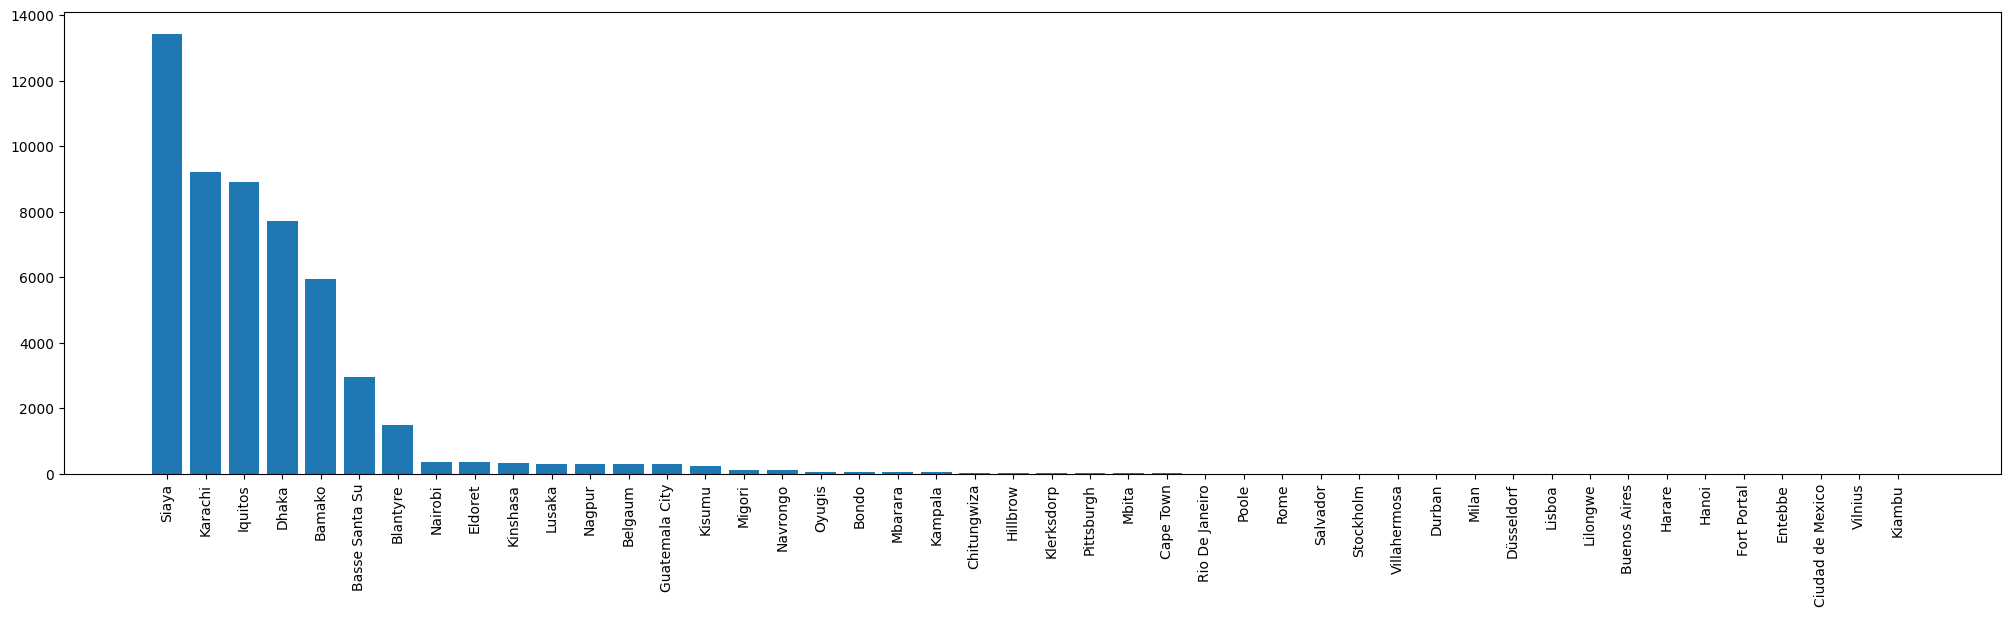

In [9]:
# Visualize city distribtuions
plt.figure(figsize=(25,6))
plt.bar(grouped_cities['city'],grouped_cities['Count'])
plt.xticks(rotation=90)
plt.show()

In [10]:
## Get data from Siaya County
siaya = 'Siaya'
siaya_sites = filtered_data[filtered_data['city'].str.contains(siaya, na=False)]
siaya_sites.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13428 entries, 391 to 52971
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   nct_id                13428 non-null  object
 1   first_date            13428 non-null  object
 2   facility_name         13428 non-null  object
 3   city                  13428 non-null  object
 4   investigator          13428 non-null  object
 5   investigator_role     13428 non-null  object
 6   sponsor_name          13428 non-null  object
 7   lead_or_collaborator  13428 non-null  object
 8   downcase_name         13428 non-null  object
 9   description           13428 non-null  object
dtypes: object(10)
memory usage: 1.1+ MB


In [11]:
# Group data by facility name

grouped_facility = siaya_sites.groupby('facility_name').size().reset_index(name='Count')

# sort data
grouped_facility = grouped_facility.sort_values(by='Count',ascending=False)


# print(grouped_facility)
grouped_facility.head(10)

,facility_name,Count
0,Abidha Health Center,1485
1,Akala Health Center,1485
2,Bar Agulu Health Center,1485
3,Dienya Health Centre,1485
4,Lwak Mission Hospital,1485
5,Ongielo Health Centre,1485
7,Siaya County Referral Hospital,1485
9,Ting Wangi Health Center,1485
10,Wagai Health Center,1485
8,Siaya District Hospital,60
